In [99]:
import os

import click
from os.path import  join, isdir
from plan import Plan
from action import Action
from utils import load_from_folder
from multiprocess import Pool


In [100]:
save_dir = './results/'
data_base_dir = '../datasets/'
domain = 'zenotravel'
results_dir = f"{save_dir}/{domain}/"   
source_dir = f"{join(data_base_dir, domain)}/optimal_plans/plans_max-plan-dim=26_train_percentage=0.8" 
print('Domain dir:', source_dir)
os.makedirs(save_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)


Domain dir: ../datasets/zenotravel/optimal_plans/plans_max-plan-dim=26_train_percentage=0.8


Data load

In [101]:
splits = {}
train_plans = load_from_folder(source_dir,["train_plans"])
train_plans = train_plans[0]
val_plans = load_from_folder(source_dir,["val_plans"])
val_plans = val_plans[0]
test_plans = load_from_folder(source_dir,["test_plans"])
test_plans = test_plans[0]

splits["train_plans"] = train_plans
splits["val_plans"] = val_plans
splits["test_plans"] = test_plans


train_plans loaded from ../datasets/zenotravel/optimal_plans/plans_max-plan-dim=26_train_percentage=0.8
val_plans loaded from ../datasets/zenotravel/optimal_plans/plans_max-plan-dim=26_train_percentage=0.8
test_plans loaded from ../datasets/zenotravel/optimal_plans/plans_max-plan-dim=26_train_percentage=0.8


Data analysis

In [102]:
print(f"Train plans: {len(train_plans)}")
print(f"Val plans: {len(val_plans)}")
print(f"Test plans: {len(test_plans)}")

Train plans: 49746
Val plans: 6218
Test plans: 6219


In [103]:
for split in splits:
    print(f"{split}: Number of plans: {len(splits[split])}")        

train_plans: Number of plans: 49746
val_plans: Number of plans: 6218
test_plans: Number of plans: 6219


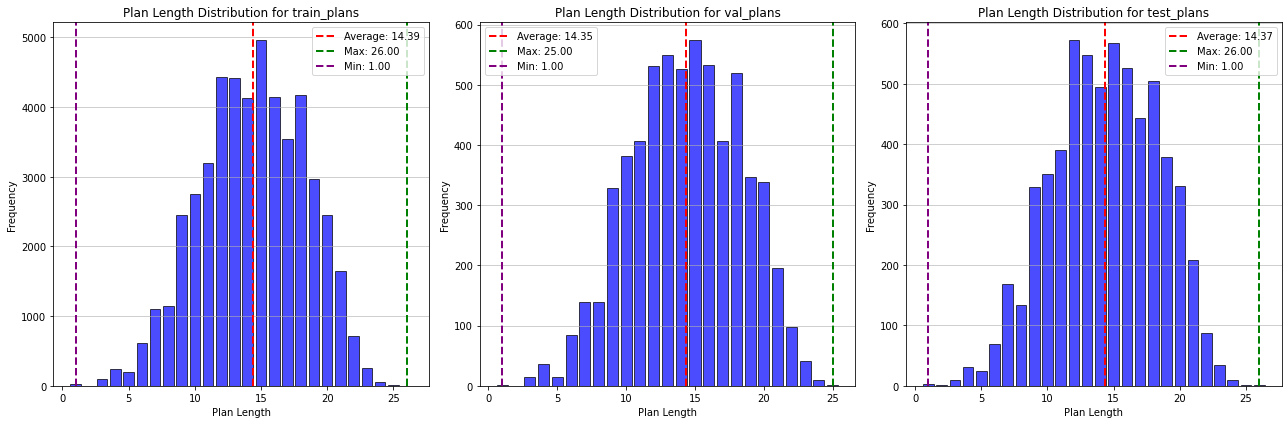

In [104]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, len(splits), figsize=(6 * len(splits), 6))
if len(splits) == 1:
    axs = [axs]
for ax, (split, plans) in zip(axs, splits.items()):
    plan_lengths = [len(plan.actions) for plan in plans]
    frequency = {}
    for length in plan_lengths:
        frequency[length] = frequency.get(length, 0) + 1
    avg_length_local = np.mean(plan_lengths)
    max_length_local = np.max(plan_lengths)
    min_length_local = np.min(plan_lengths)
    ax.bar(frequency.keys(), frequency.values(), color='blue', alpha=0.7, edgecolor='black')
    ax.axvline(x=avg_length_local, color='red', linestyle='--', linewidth=2, label=f'Average: {avg_length_local:.2f}')
    ax.axvline(x=max_length_local, color='green', linestyle='--', linewidth=2, label=f'Max: {max_length_local:.2f}')
    ax.axvline(x=min_length_local, color='purple', linestyle='--', linewidth=2, label=f'Min: {min_length_local:.2f}')
    ax.set_title(f"Plan Length Distribution for {split}")
    ax.set_xlabel("Plan Length")
    ax.set_ylabel("Frequency")
    ax.grid(axis='y', alpha=0.75)
    ax.legend()
plt.tight_layout()
plt.savefig(f"{save_dir}/{domain}/{domain}_combined_plan_length_distribution.jpeg")
plt.show()

In [105]:
for split, plans in splits.items():
    print(f"Plan {plans[0].plan_name} for {split}:")
    for action in plans[0].actions:
        print(f"    {action.name}")
        print(f"        + : {action.positiveEffects}")
        print(f"        - : {action.negativeEffects}")
    print()

Plan /data/users/mchiari/WMCA/datasets/zenotravel/optimal_plans/xmls//xml-LPG-p008088.SOL for train_plans:
    BOARD PERSON5 PLANE3 CITY3
        + : ['in person5 plane3']
        - : ['at person5 city3']
    BOARD PERSON1 PLANE3 CITY3
        + : ['in person1 plane3']
        - : ['at person1 city3']
    FLY PLANE3 CITY3 CITY0 FL4 FL6
        + : ['at plane3 city0', 'fuel-level plane3 fl6']
        - : ['at plane3 city3', 'fuel-level plane3 fl4']
    BOARD PERSON3 PLANE3 CITY0
        + : ['in person3 plane3']
        - : ['at person3 city0']
    BOARD PERSON2 PLANE3 CITY0
        + : ['in person2 plane3']
        - : ['at person2 city0']
    FLY PLANE3 CITY0 CITY1 FL6 FL5
        + : ['at plane3 city1', 'fuel-level plane3 fl5']
        - : ['at plane3 city0', 'fuel-level plane3 fl6']
    DEBARK PERSON2 PLANE3 CITY1
        + : ['at person2 city1']
        - : ['in person2 plane3']
    FLY PLANE3 CITY1 CITY4 FL5 FL0
        + : ['at plane3 city4', 'fuel-level plane3 fl0']
        - : 

In [106]:
for split, plans in splits.items():
    for plan in plans[:3]:
        print(f"Plan {plan.goals}:")
        print()

Plan ['at plane1 city5', 'at person2 city1', 'at person4 city0', 'at person3 city4', 'at person5 city4', 'at person1 city5', 'at person8 city1', 'at person7 city2']:

Plan ['at plane1 city4', 'at person7 city3', 'at person4 city1', 'at person8 city3', 'at person1 city4', 'at person5 city4']:

Plan ['at plane1 city3', 'at person4 city5', 'at person8 city2', 'at person1 city4', 'at person2 city1', 'at person7 city4', 'at person3 city1', 'at person5 city0']:

Plan ['at plane3 city3', 'at person2 city3', 'at person3 city3', 'at person6 city0', 'at person4 city4', 'at person5 city1', 'at person7 city5', 'at person8 city0', 'at person1 city0']:

Plan ['at plane3 city3', 'at person5 city3', 'at person1 city2', 'at person4 city3', 'at person6 city1', 'at person8 city4']:

Plan ['at plane2 city5', 'at person5 city4', 'at person7 city5', 'at person1 city0', 'at person6 city4', 'at person8 city5', 'at person2 city2', 'at person4 city5']:

Plan ['at plane3 city3', 'at person2 city1', 'at person1 c

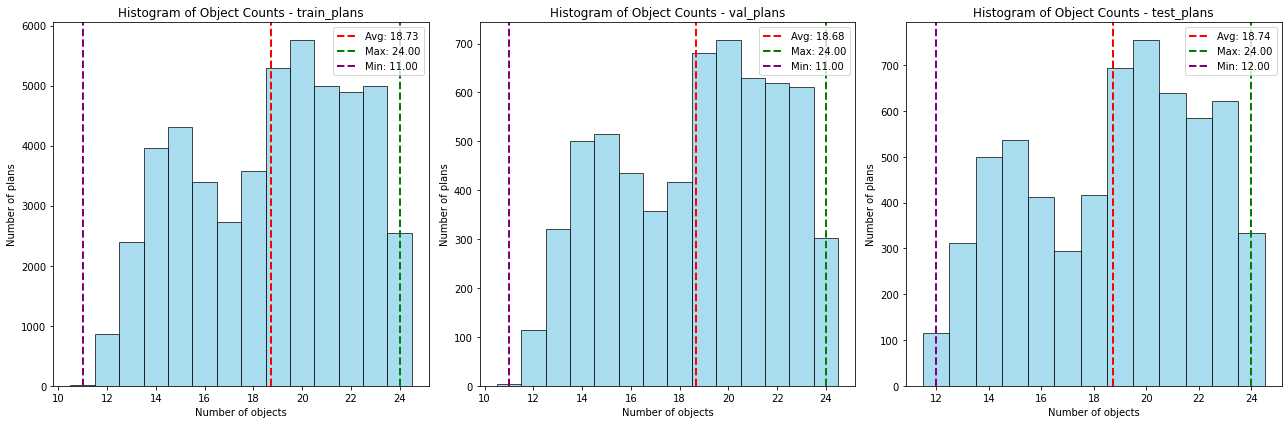

In [107]:
# counting plan init objects,
# how can i know all objects in the domain without the domain?
# try to explore the plan to find all objects involved
    
# create a combined figure with subplots for object count histograms
fig, axs = plt.subplots(1, len(splits), figsize=(6 * len(splits), 6))
if len(splits) == 1:
    axs = [axs]

for ax, (split, plans) in zip(axs, splits.items()):
    obj_numbers_list = []
    for plan in plans:
        obj_set = set()
        for text in plan.initial_state:
            for obj in text.split(" ")[1:]:
                obj_set.add(obj)
        for action in plan.actions:
            for fluent in action.positiveEffects:
                for obj in fluent.split(" ")[1:]:
                    obj_set.add(obj)
            for fluent in action.negativeEffects:
                for obj in fluent.split(" ")[1:]:
                    obj_set.add(obj)
        obj_numbers_list.append(len(obj_set))
        
    bins = np.arange(min(obj_numbers_list), max(obj_numbers_list) + 2, 1)
    # bins = 20 #for logistics
    ax.hist(obj_numbers_list, bins=bins, color='skyblue', edgecolor='black', alpha=0.7, align='left')
    avg_val = np.mean(obj_numbers_list)
    max_val = np.max(obj_numbers_list)
    min_val = np.min(obj_numbers_list)
    ax.axvline(x=avg_val, color='red', linestyle='--', linewidth=2, label=f'Avg: {avg_val:.2f}')
    ax.axvline(x=max_val, color='green', linestyle='--', linewidth=2, label=f'Max: {max_val:.2f}')
    ax.axvline(x=min_val, color='purple', linestyle='--', linewidth=2, label=f'Min: {min_val:.2f}')

    ax.set_title(f"Histogram of Object Counts - {split}")
    ax.set_xlabel("Number of objects")
    ax.set_ylabel("Number of plans")
    ax.legend()
plt.tight_layout()
plt.savefig(f"{save_dir}/{domain}/{domain}_combined_obj_count_histogram.jpeg")
plt.show()
